In [ ]:
#df[x]=df[name]="  "df[name]

In [ ]:
#df['X']  = df['company_profile']+ ' ' +df['description']+ '  ' +df['requirements']

In [17]:
import pandas as pd

In [18]:
df=pd.read_csv(r"D:\Data Science\python\fake_job_postings.csv")

In [19]:
df.isnull().sum()


job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [20]:
df= df.dropna()

In [21]:
df.head(2)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
15,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0


In [22]:
x=df.loc[:,['title','description','requirements','employment_type','industry']]

In [23]:
x["c"]=df['title']+ " " +df['description']+ " " +df['requirements']+ " " +df['employment_type']+ " " +df['industry']

In [24]:
x

,title,description,requirements,employment_type,industry,c
6,Head of Content (m/f),Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Full-time,Online Media,Head of Content (m/f) Your Responsibilities: M...
15,VP of Sales - Vault Dragon,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,Full-time,Facilities Services,VP of Sales - Vault Dragon About Vault Dragon ...
23,"Vice President, Sales and Sponsorship (Busines...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Full-time,Internet,"Vice President, Sales and Sponsorship (Busines..."
98,IC&E Technician,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",Full-time,Oil & Energy,IC&E Technician IC&amp;E Technician | Bakersfi...
102,Marketing Administrator,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",Full-time,Internet,Marketing Administrator The job is to support ...
...,...,...,...,...,...,...
17734,Customer Service Representative,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,Full-time,Real Estate,Customer Service Representative We are Seeking...
17759,Customer Service Representative,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,Full-time,Real Estate,Customer Service Representative We are Seeking...
17813,Customer Service Representative,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,Full-time,Real Estate,Customer Service Representative We are Seeking...
17849,Communication Designer,Balanced Labs exists to improve the lives of a...,"Specifically, we’re looking for:5+ years of vi...",Full-time,Computer Software,Communication Designer Balanced Labs exists to...


In [41]:
#x= x.c
y= df.fraudulent
y

6        0
15       0
23       0
98       1
102      0
        ..
17734    1
17759    1
17813    1
17849    0
17865    0
Name: fraudulent, Length: 774, dtype: int64

In [27]:
x.str.lower()

6        head of content (m/f) your responsibilities: m...
15       vp of sales - vault dragon about vault dragon ...
23       vice president, sales and sponsorship (busines...
98       ic&e technician ic&amp;e technician | bakersfi...
102      marketing administrator the job is to support ...
                               ...                        
17734    customer service representative we are seeking...
17759    customer service representative we are seeking...
17813    customer service representative we are seeking...
17849    communication designer balanced labs exists to...
17865    portfolio development associate - paris & rest...
Name: c, Length: 774, dtype: object

In [31]:
from nltk.corpus import stopwords
import string
abcd= stopwords.words("english")
c=string.punctuation

In [32]:
def text_process(mess):            ### creating a function
    """                                                        ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in c]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not  in abcd]

In [33]:
x.apply(text_process)

6        [Head, Content, mf, Your, Responsibilities, Ma...
15       [VP, Sales, Vault, Dragon, About, Vault, Drago...
23       [Vice, President, Sales, Sponsorship, Business...
98       [ICE, Technician, ICampE, Technician, Bakersfi...
102      [Marketing, Administrator, The, job, support, ...
                               ...                        
17734    [Customer, Service, Representative, We, Seekin...
17759    [Customer, Service, Representative, We, Seekin...
17813    [Customer, Service, Representative, We, Seekin...
17849    [Communication, Designer, Balanced, Labs, exis...
17865    [Portfolio, Development, Associate, Paris, res...
Name: c, Length: 774, dtype: object

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
bow_transformer= CountVectorizer(analyzer=text_process).fit(x)

In [36]:
tdm= bow_transformer.transform(x)

In [37]:
from sklearn.model_selection import train_test_split

In [42]:
train_x,test_x,train_y,test_y=train_test_split(tdm,y,test_size=.2,random_state=22)

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()

In [44]:
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [45]:
pred= dt.predict(test_x)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
tab=confusion_matrix(test_y,pred)

In [48]:
tab.diagonal().sum()*100/tab.sum()

94.19354838709677

In [49]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(train_x,train_y)

MultinomialNB()

In [50]:
pred_nb= nb.predict(test_x)
tab_nb=confusion_matrix(test_y, pred_nb)
tab_nb.diagonal().sum()*100/tab_nb.sum()

95.48387096774194

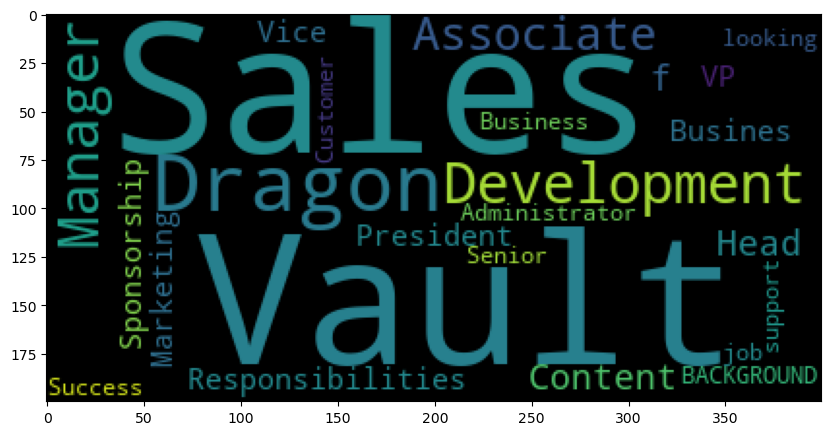

In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
cloud= WordCloud(stopwords = stopwords.words("english"),max_words=25).generate(str(x[y==0]))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

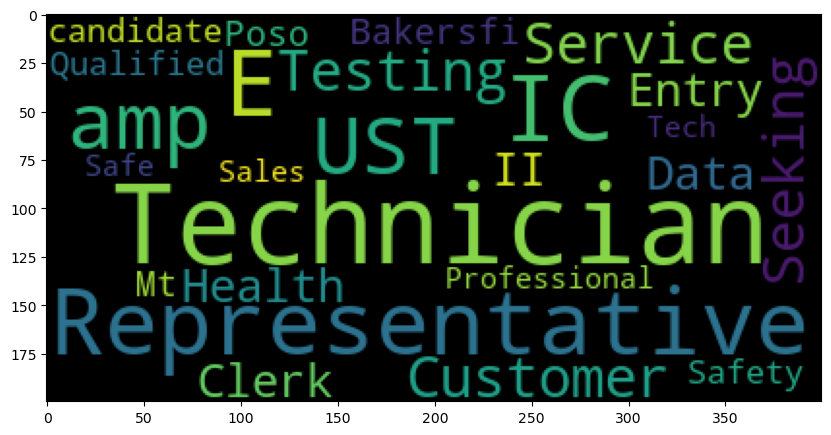

In [53]:
from wordcloud import WordCloud
cloud= WordCloud(stopwords = stopwords.words("english"),max_words=25).generate(str(x[y==1]))
plt.figure(figsize=(10,10))
plt.imshow(cloud)